



# Business project for portfolio

A fictional telecommunications company was dedicated to making informed decisions based on historical data. In order to optimize its business, the company needed to identify which customers were likely to cancel their service after their contract expired (known as "churn"), as this information could be used to target marketing efforts towards those customers and increase retention rates. By treating data as an asset, the company could gain valuable insights and make more informed decisions, ultimately leading to increased financial gains and a competitive edge in the market.

# Importing Libraries

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')



# Importing DataSet

In [134]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
df=pd.read_csv('/content/drive/My Drive/DataSet/telecom_costumer_churn.csv')

#I've used Pandas to import.

In [136]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Descriptive analysis

In [137]:
import pandas as pd

data = {'Attribute': ['CustomerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
        'Type': ['Categorical Nominal', 'Categorical Nominal', 'Binary Categorical', 'Binary Categorical', 'Binary Categorical', 'Discrete Numeric', 'Binary Categorical', 'Binary Categorical', 'Categorical Nominal', 'Binary Categorical', 'Binary Categorical', 'Binary Categorical', 'Binary Categorical', 'Binary Categorical', 'Binary Categorical', 'Categorical Nominal', 'Binary Categorical', 'Categorical Nominal', 'Continuous Numeric', 'Continuous Numeric', 'Binary Categorical'],
        'Description': ['- Primary key - identifier attribute',
                        "- Informs the customer's gender (Male and Female)",
                        '- Informs whether the customer is a senior citizen (1) or not (0)',
                        '- Informs whether the customer closed directly with the partner company or with a reseller partner.',
                        '- Informs whether there are other people linked to the main customer\'s contract. In practice, such data is useful for better understanding the family and social dynamics of customers, and therefore can be more efficient in providing plan and marketing solutions.',
                        '- Number of months the customer has been with the company since the first contract',
                        '- Informs whether the customer has a phone service contract.',
                        '- Informs how many phone lines were contracted.',
                        '- Informs the type of internet service contracted (Optical Fiber, DSL)',
                        '- Additional security service for those who have hired an internet network.',
                        '- Service that provides users with a system for backup, storage and retrieval of computer files.',
                        '- Device protection service (works as an insurance for cell phones).',
                        '- Technical support service.',
                        '- Cable TV service (such as Sky, etc.)',
                        '- Streaming service (such as Netflix, etc.)',
                        '- Types of contracts closed (monthly, yearly and biennial).',
                        '- Informs whether the payment method is "paperless billing", that is, whether the customer pays completely electronically, or if there is any physical resource.',
                        '- Payment method (4 available).',
                        "- Customer's monthly fee.",
                        '- Total amount of revenue derived from the customer since the beginning of the contract.',
                        '- Finally, it informs whether such a customer has churned (1), or not (0).']}

Description = pd.DataFrame(data)

display(Description)


,Attribute,Type,Description
0,CustomerID,Categorical Nominal,- Primary key - identifier attribute
1,gender,Categorical Nominal,- Informs the customer's gender (Male and Female)
2,SeniorCitizen,Binary Categorical,- Informs whether the customer is a senior cit...
3,Partner,Binary Categorical,- Informs whether the customer closed directly...
4,Dependents,Binary Categorical,- Informs whether there are other people linke...
5,tenure,Discrete Numeric,- Number of months the customer has been with ...
6,PhoneService,Binary Categorical,- Informs whether the customer has a phone ser...
7,MultipleLines,Binary Categorical,- Informs how many phone lines were contracted.
8,InternetService,Categorical Nominal,- Informs the type of internet service contrac...
9,OnlineSecurity,Binary Categorical,- Additional security service for those who ha...


In [138]:
df.describe()



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [139]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [140]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [141]:
df.corr()['TotalCharges']



SeniorCitizen     0.102411
tenure            0.825880
MonthlyCharges    0.651065
TotalCharges      1.000000
Name: TotalCharges, dtype: float64

As the "TotalCharges" variable has a high correlation with "tenure", we will use the median of customers whose service relationship time (tenure) is in a similar interval.

In [142]:
df[pd.isnull(df['TotalCharges'])]



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


However, all customers with NaN in "TotalCharges" have 0 in the "tenure" attribute.

Explanation: These are customers who were recently added to the company. So, they have a monthly fee, but since the contract was closed recently, a month has not yet passed since the dataset was extracted.

In [143]:
#So, we will exclude such rows from the DataFrame.

df=df.dropna(axis=0)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [144]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

df=df.iloc[:,1:]
    

In [145]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [146]:
#It is necessary to transform categorical variables into binary numerical variables to analyze correlation.

df2= pd.get_dummies(df)


In [147]:
sns.set_palette('dark')
sns.set_style('dark')


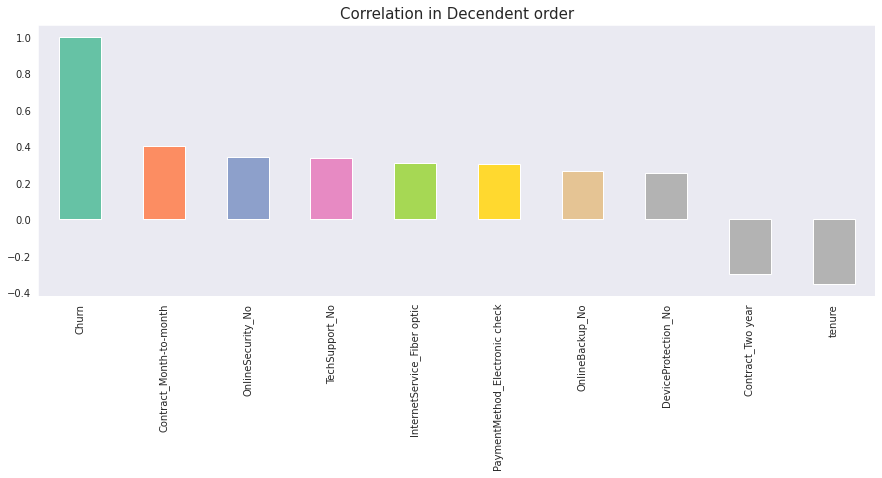

In [148]:
plt.figure(figsize=(15,5))
corr = df2.corr()['Churn']
mask = (corr > 0.25) | (corr < -0.25)
if mask.any():
    sorted_corr = corr[mask].sort_values(ascending=False)
    colors = plt.cm.Set2(range(len(sorted_corr)))
    sorted_corr.plot(kind='bar', color=colors)
    
plt.title('Correlation in Decendent order', size=15)
plt.show()



In [149]:
df2.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Femal

Insight One:
The variable that had the highest correlation with Churn was 'Contract_Month-to-month', with 40% correlation, indicating that the possibility of the customer paying monthly (as opposed to annually) makes them more likely to cancel (Churn). This is supported by the fact that Contract_One year has -17.82% correlation and Contract_Two year has -30.15% correlation. The longer the proposed contract time, the lower the Churn rate. Perhaps customers who close annual contracts become more confident in the product and its efficiency, which represents less than half of the total data, since about 55% of closed contracts are 'Month to Month'.

In [150]:
df_copy=df

# Individual Variable Analysis: Exploring the Behavior of Each Feature

## Demographic info

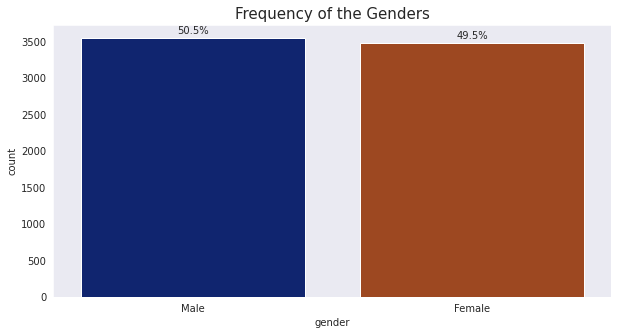

In [151]:
plt.figure(figsize=(10,5))


order=df['gender'].value_counts()
ax=sns.countplot(data=df, x='gender', palette= 'dark', order=order.index)

plt.title('Frequency of the Genders', size=15)
patches= ax.patches
porcentagem=(df['gender'].value_counts()*100/len(df['gender']))

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+50
   ax.annotate('{:.1f}%'.format(porcentagem[i]), (x, y), ha='center')
plt.show()






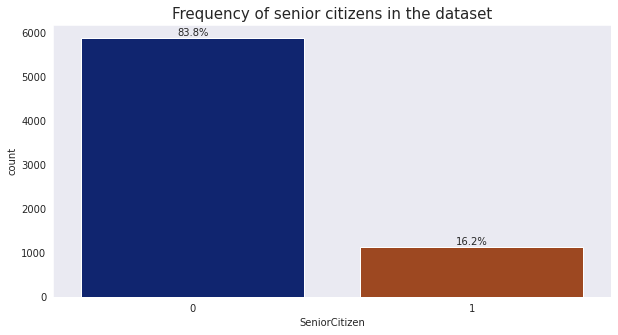

In [152]:

plt.figure(figsize=(10,5))

order=df['SeniorCitizen'].value_counts()
ax=sns.countplot(data=df, x='SeniorCitizen', palette= 'dark', order=order.index)

plt.title('Frequency of senior citizens in the dataset', size=15)
patches= ax.patches
porcentagem=(df['SeniorCitizen'].value_counts()*100/len(df['SeniorCitizen']))

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+50
   ax.annotate('{:.1f}%'.format(porcentagem[i]), (x, y), ha='center')
plt.show()








Text(0.5, 1.0, 'Frequency of contracts closed with partners and dependents')

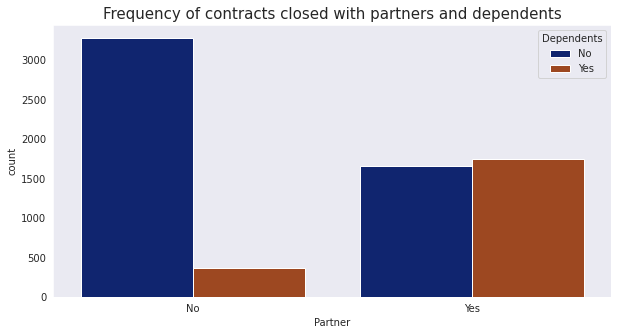

In [153]:
plt.figure(figsize=(10,5))


order=df['Partner'].value_counts()
ax=sns.countplot(data=df, x='Partner', palette= 'dark', order=order.index, hue='Dependents')

plt.title('Frequency of contracts closed with partners and dependents', size=15)


Text(34.042875426621166, 804.1949999999999, 'Mean (μ): 32.42')

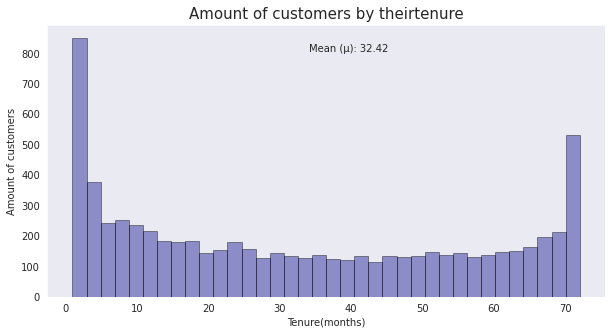

In [154]:
plt.figure(figsize=(10,5))


sns.distplot(df['tenure'], hist=True, kde=False, bins=int(36), color='darkblue', hist_kws={'edgecolor':'black'})
plt.title('Amount of customers by theirtenure', size=15)
plt.xlabel('Tenure(months)')
plt.ylabel('Amount of customers')

min_ylim, max_ylim = plt.ylim()
plt.text(df['tenure'].mean()*1.05, max_ylim*0.90, 'Mean (μ): {:.2f}'.format(df['tenure'].mean()))



As suspected, most customers are concentrated in the first few months of their contracts, with another peak at the end.

## Services Info

In [155]:
df.columns.values


array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

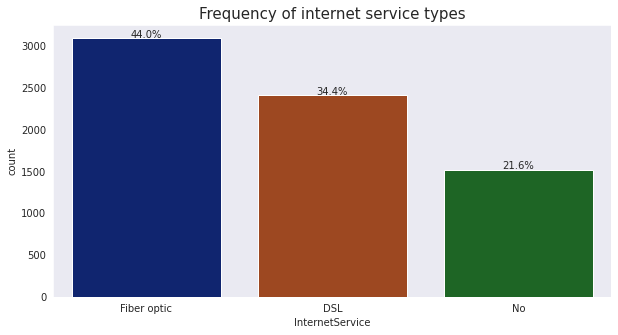

In [156]:
plt.figure(figsize=(10,5))

order=df['InternetService'].value_counts()

ax=sns.countplot(data=df, x='InternetService', palette= 'dark', order=order.index)

plt.title('Frequency of internet service types', size=15)
patches= ax.patches
porcentagem=(df['InternetService'].value_counts()*100/len(df['InternetService']))


for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+5
   ax.annotate('{:.1f}%'.format(porcentagem[i]), (x, y), ha='center')
plt.show()



20% of the contracts do not include internet service.

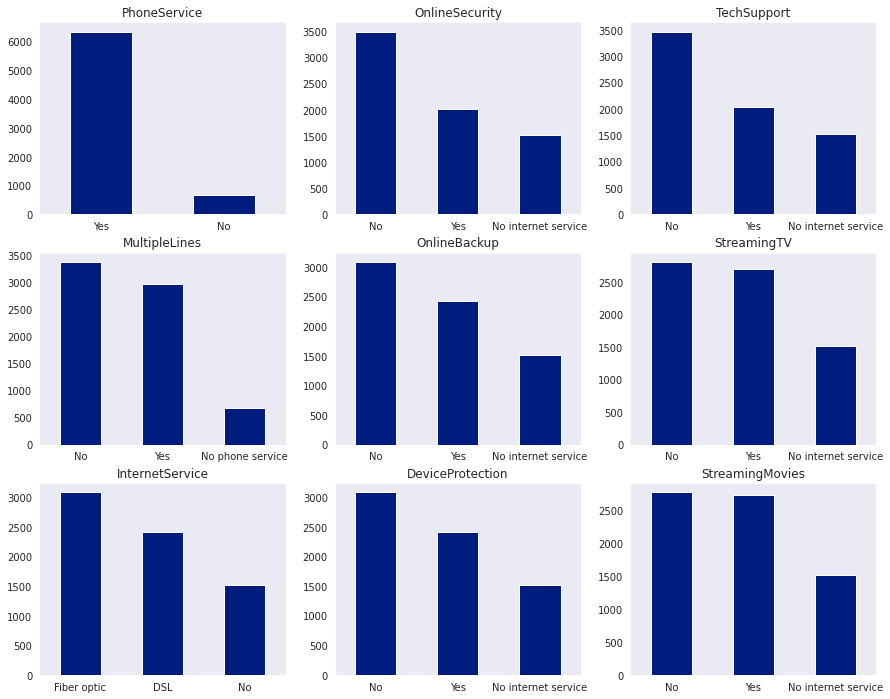

In [157]:
service=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(service):
    if i < 3:
         df[item].value_counts().plot.bar(ax=axes[i,0],rot = 0, title=item)
        
    elif i >=3 and i < 6:
         df[item].value_counts().plot.bar(ax=axes[i-3,1],rot = 0, title=item)
        
    elif i < 9:
         df[item].value_counts().plot.bar(ax=axes[i-6,2],rot = 0, title=item)
            


More than 90% of customers have phone service in their contract, with just over half of them using multiple lines.
On the other hand, internet service covers approximately 50% of the customers in the DataFrame. This indicates that a significant number of customers enter into contracts with the company without internet service, which may represent an opportunity as there are several other services that can only be offered to customers who purchase internet.

Text(0.5, 1.0, 'Phone Service and Internet Service Subscription Distribution')

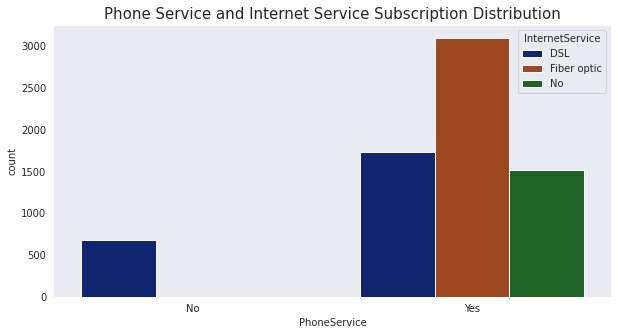

In [158]:
plt.figure(figsize=(10,5))

sns.countplot(x= df['PhoneService'], hue=df['InternetService'])
plt.title('Phone Service and Internet Service Subscription Distribution', size=15)


Business question:

Why do all customers in the dataset who do not have phone service only use DSL internet?

Fiber optic internet is the company's main service (by frequency). Is it also the most profitable in terms of ROIC?

How do customers who subscribe to this type of service behave? Do they tend to stay longer with the company? Do they have low churn rates?

## Customer account information

Mean monthly charge of customers with Fiber optic service.: 91.50
Mean monthly charge of customers with DSL.: 58.09
Mean monthly charge of customers with no phone service.:  21.08




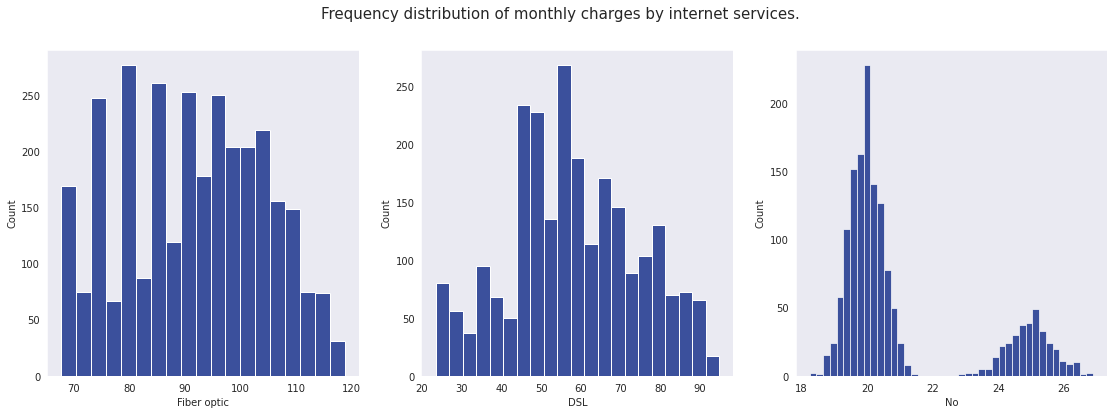

In [159]:
#Pelos gráficos abaixo, supôe-se que o serviço de fibra óptica é que possui ticket maior.

fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(19,6))
fig.suptitle('Frequency distribution of monthly charges by internet services.', fontsize=15)

sns.histplot(x=df['MonthlyCharges'][df['InternetService']=='Fiber optic'], ax=ax[0])
ax[0].set_xlabel('Fiber optic')
sns.histplot(x=df['MonthlyCharges'][df['InternetService']=='DSL'], ax=ax[1])
ax[1].set_xlabel('DSL')
sns.histplot(x=df['MonthlyCharges'][df['InternetService']=='No'], ax=ax[2])
ax[2].set_xlabel('No')
print('Mean monthly charge of customers with Fiber optic service.: {:.2f}' .format(df['MonthlyCharges'][df['InternetService']=='Fiber optic'].mean()))
print('Mean monthly charge of customers with DSL.: {:.2f}' .format(df['MonthlyCharges'][df['InternetService']=='DSL'].mean()))
print('Mean monthly charge of customers with no phone service.:  {:.2f}\n\n' .format(df['MonthlyCharges'][df['InternetService']=='No'].mean()))

The most requested type of internet generates, on average, the highest revenue for the company.

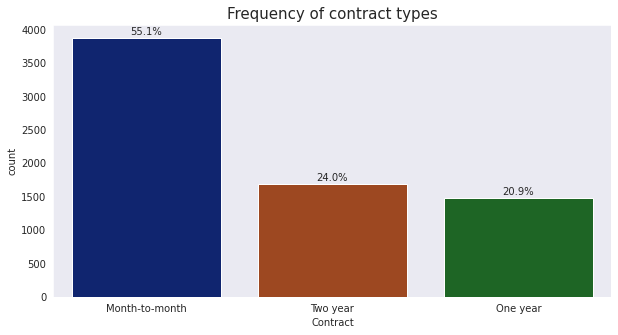

In [160]:
plt.figure(figsize=(10,5))

order=df['Contract'].value_counts()
ax=sns.countplot(data=df, x='Contract', palette= 'dark', order=order.index)

plt.title('Frequency of contract types', size=15)
porcentage=(df['Contract'].value_counts()*100/len(df['Contract']))
patches= ax.patches

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+50
   ax.annotate('{:.1f}%'.format(porcentage[i]), (x, y), ha='center')
plt.show()



Text(0.5, 0, 'Two year')

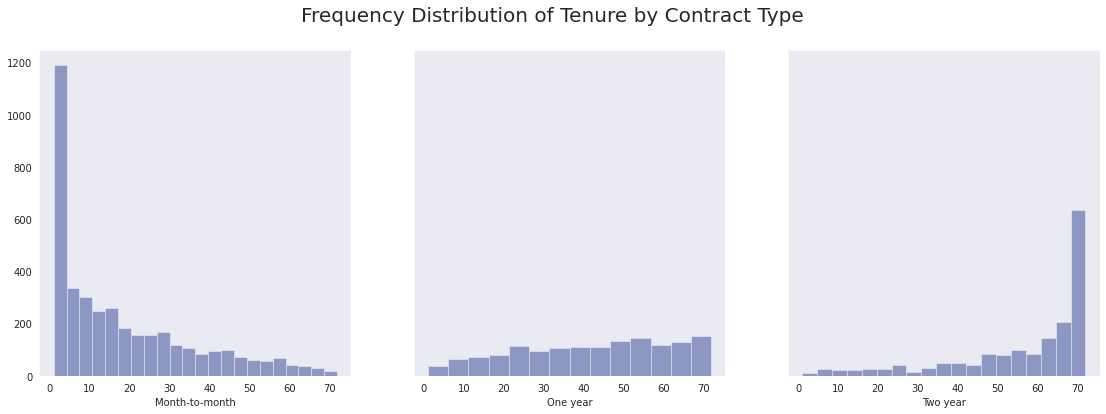

In [161]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (19,6))

fig.suptitle('Frequency Distribution of Tenure by Contract Type', fontsize=20)
ax1 = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'], hist=True, kde=False, ax=ax1)
ax1.set_xlabel('Month-to-month')

ax2 = sns.distplot(df[df['Contract']=='One year']['tenure'], hist=True, kde=False, ax=ax2)
ax2.set_xlabel('One year')

ax3 = sns.distplot(df[df['Contract']=='Two year']['tenure'], hist=True, kde=False, ax=ax3)
ax3.set_xlabel('Two year')


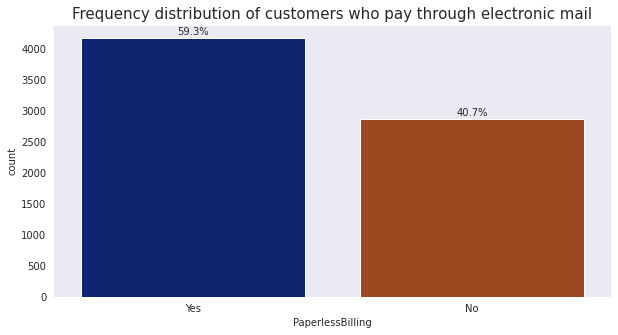

In [162]:

plt.figure(figsize=(10,5))

order=df['PaperlessBilling'].value_counts()
ax=sns.countplot(data=df, x='PaperlessBilling', palette= 'dark', order=order.index)

plt.title('Frequency distribution of customers who pay through electronic mail', size=15)
patches= ax.patches
porcentagem=(df['PaperlessBilling'].value_counts()*100/len(df['PaperlessBilling']))

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+50
   ax.annotate('{:.1f}%'.format(porcentagem[i]), (x, y), ha='center')
plt.show()


[Text(0, 0, 'Electronic check'),
 Text(1, 0, 'Mailed check'),
 Text(2, 0, 'Bank transfer (automatic)'),
 Text(3, 0, 'Credit card (automatic)')]

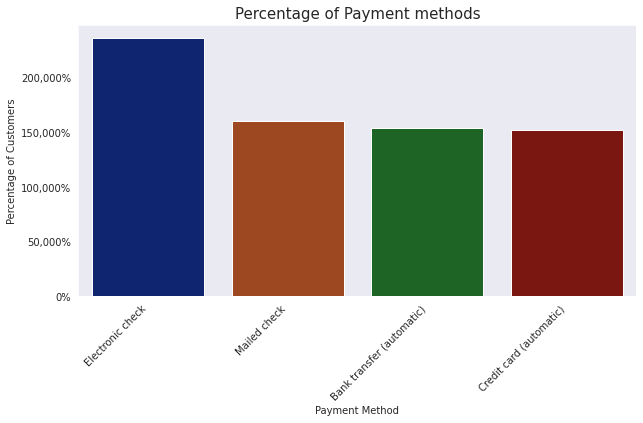

In [163]:

plt.figure(figsize=(10,5))
ax = sns.countplot(x='PaymentMethod', data=df)

plt.title('Percentage of Payment methods', size=15)
ax.set_xlabel('Payment Method')
ax.set_ylabel('Percentage of Customers')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


The payment methods are well distributed, with emphasis on eCheck.

Text(68.0381186006826, 870.912, 'Mean (μ): 64.80')

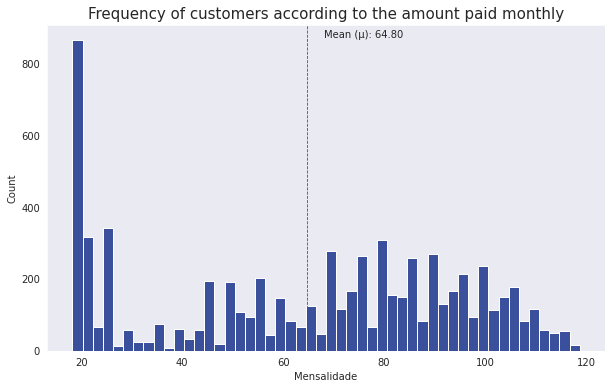

In [164]:
plt.figure(figsize=(10,6))
sns.histplot(df['MonthlyCharges'], bins=50)
plt.title('Frequency of customers according to the amount paid monthly', size=15)
plt.xlabel('Mensalidade')

df['MonthlyCharges'].median()

min_ylim, max_ylim = plt.ylim()
plt.axvline(df['MonthlyCharges'].mean(), color='red', linestyle= '--', linewidth= 0.8)
plt.text(df['MonthlyCharges'].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df['MonthlyCharges'].mean()))

The majority of the distribution is concentrated on a lower MonthlyCharges. However, after this initial concentration (after 23..), there seems to be a possible increase in the frequency of the MonthlyCharges.

Insight: In fact, most people will pay the basic fee for the initial service. However, by being open to accepting additional services, there is a possibility of significantly increasing the MonthlyCharges.

Text(0.5, 0, 'Total')

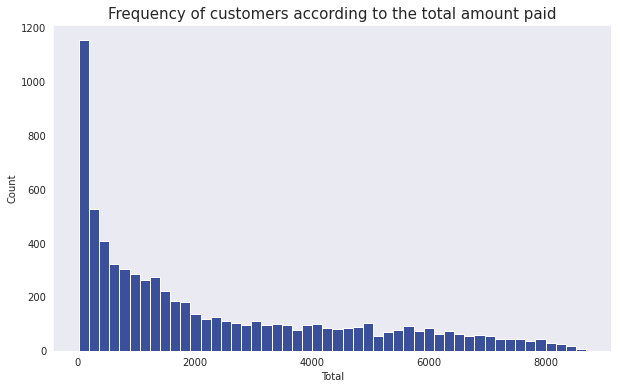

In [165]:
plt.figure(figsize=(10,6))
sns.histplot(df['TotalCharges'], bins=50)
plt.title('Frequency of customers according to the total amount paid', size=15)
plt.xlabel('Total')


There are long-standing customers who have brought significant revenue to the company due to their length of stay.

Text(0.5, 1.0, 'Relationship between the total amount paid by the customer and their current monthlyCharges')

<Figure size 1080x432 with 0 Axes>

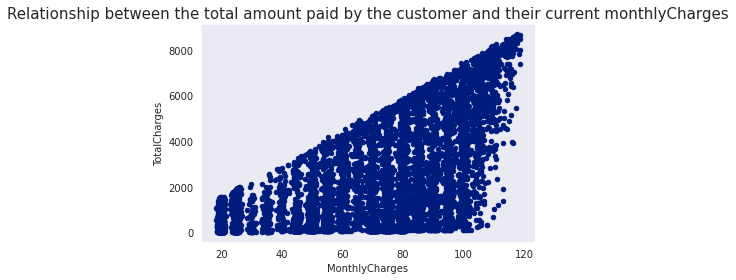

In [166]:
plt.figure(figsize=(15,6))
df.plot.scatter(x='MonthlyCharges' , y='TotalCharges')
plt.title('Relationship between the total amount paid by the customer and their current monthlyCharges', size=15)



The key to earning for the company is through increasing the monthlyCharge per customer.

- Hypothesis: Customers who pay more per month tend to stay longer.

Text(0.5, 1.0, 'elationship between total contract time and MonthlyCharges.')

<Figure size 1008x576 with 0 Axes>

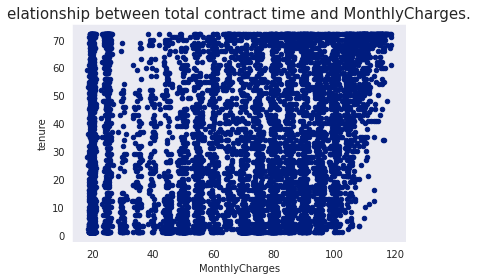

In [167]:

plt.figure(figsize=(14,8))
df.plot.scatter(x='MonthlyCharges' , y='tenure')
plt.title('elationship between total contract time and MonthlyCharges.', size=15)

The correlation between the total contract time and the MonthlyCharges has a correlation equal to 0.25, which constitutes a low significant relationship.

- Since there is no strong linear relationship between the 'tenure' and 'MonthlyCharges' variables, that is, between the time spent by the customer with the company and their monthlycharges, this is a hypothesis that needs to be further investigated and analyzed.

# Examining the Relationship between Variables and Churn Rate

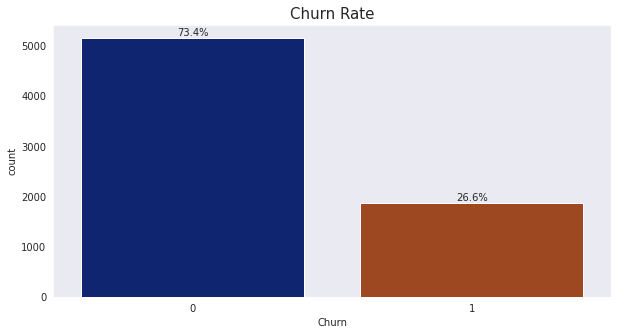

In [168]:
plt.figure(figsize=(10,5))

order=df['Churn'].value_counts()
ax=sns.countplot(data=df, x='Churn', palette= 'dark', order=order.index)

plt.title('Churn Rate', size=15)
patches= ax.patches
porcentagem=(df['Churn'].value_counts()*100/len(df['Churn']))

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+50
   ax.annotate('{:.1f}%'.format(porcentagem[i]), (x, y), ha='center')
plt.show()


- Unbalanced target variable

Text(0.5, 1.0, 'Box plot analysis of contract duration in relation to the Churn')

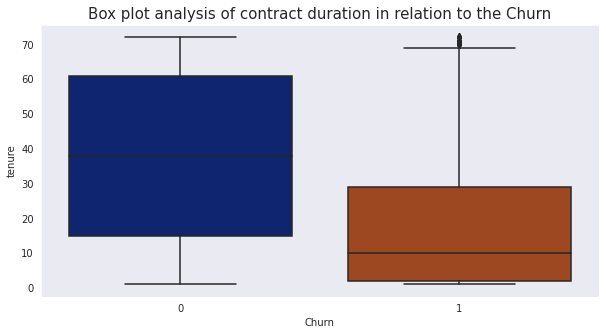

In [169]:
plt.figure(figsize=(10,5))
sns.boxplot(x= df['Churn'], y= df['tenure'])

plt.title('Box plot analysis of contract duration in relation to the Churn', size=15)


- Tenure is the variable with the highest negative correlation with churn rate.

In fact, according to the dataset, customers who have used the company's service for a longer period of time are less likely to churn. Dissatisfaction with the service often occurs in the early months, prompting the customer to cancel the service.

Text(0.5, 1.0, 'Frequency distribution of churn rate based on specific contract duration intervals')

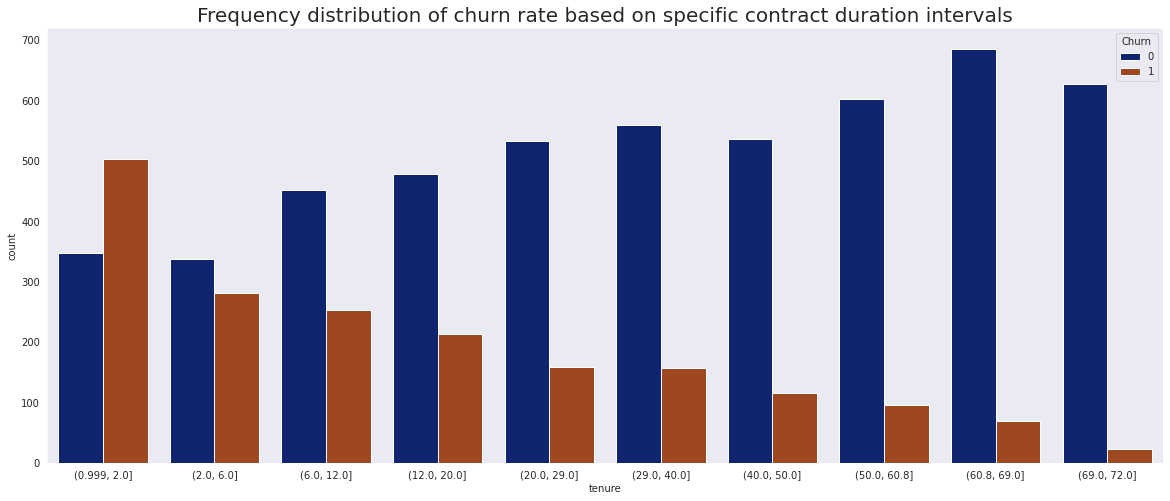

In [170]:
df2['tenure'] = pd.qcut(df['tenure'], 10)

plt.figure(figsize=(20,8))
sns.countplot(data= df2, x='tenure', hue='Churn')

plt.title('Frequency distribution of churn rate based on specific contract duration intervals', size=20)

It is clear from the data that the churn rate decreased considerably as the customer stayed longer with the company.

Text(0.5, 1.0, 'Churn Rate by Contract Type and Online Security')

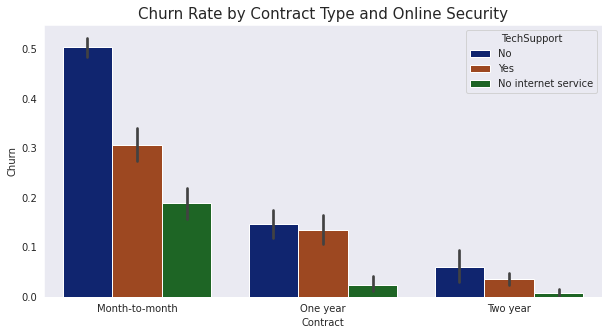

In [171]:
plt.figure(figsize=(10,5))

sns.barplot(y=df['Churn'], x= df['Contract'], hue=df['TechSupport'])

plt.title('Churn Rate by Contract Type and Online Security', size=15)


Customers without technical support have a higher churn rate.

Text(0.5, 1.0, 'Distribution of customers by contract type and Churn ')

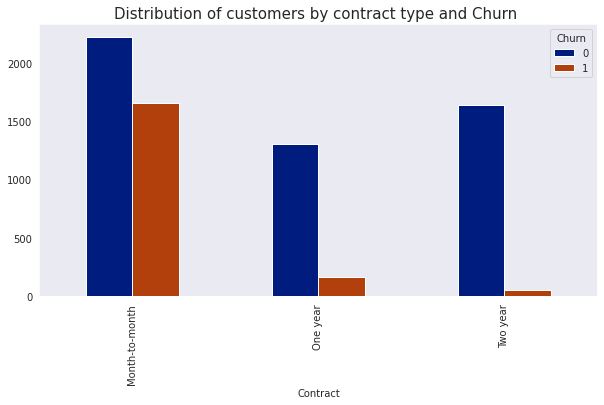

In [172]:
contract= df.groupby(['Contract','Churn']).size().unstack()


contract.plot.bar(figsize=(10,5))
plt.title('Distribution of customers by contract type and Churn ', size=15)

Monthly closed contracts show a high Churn Rate.
In theory, the longer the contracts, the lower the probability of churn.

Text(0.5, 1.0, 'Frequency of Churn according to Senior Citizen status')

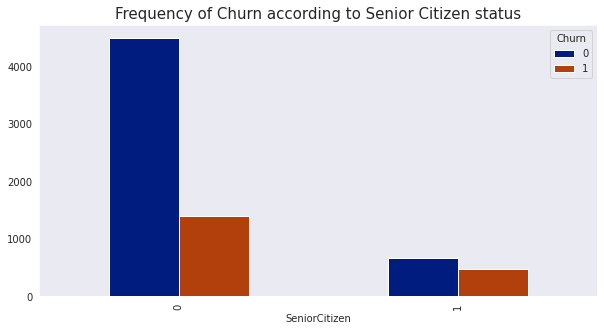

In [173]:
sc= df.groupby(['SeniorCitizen','Churn']).size().unstack()

sc.plot.bar(figsize=(10,5))
plt.title('Frequency of Churn according to Senior Citizen status', size=15)




Despite seniors representing only 20% of the dataset, they have a significantly higher Churn Rate.

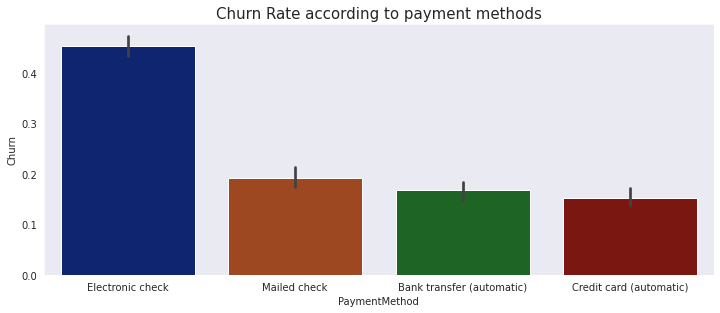

In [174]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['Churn'], x= df['PaymentMethod'])
plt.title('Churn Rate according to payment methods', size=15)
plt.ylabel('Churn')


plt.subplots_adjust(bottom=0.3, wspace=0.4)


Automated payments clearly have a lower Churn Rate than payments that require customer action.

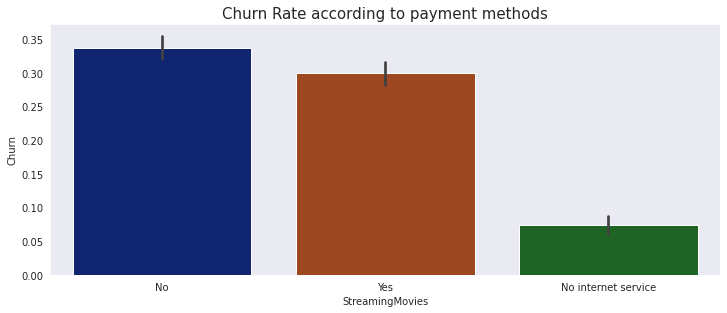

In [175]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['Churn'], x= df['StreamingMovies'])
plt.title('Churn Rate according to payment methods', size=15)
plt.ylabel('Churn')


plt.subplots_adjust(bottom=0.3, wspace=0.4)

(array([0, 1, 2, 3]),
 [Text(0, 0, '(No, No)'),
  Text(1, 0, '(No, Yes)'),
  Text(2, 0, '(Yes, No)'),
  Text(3, 0, '(Yes, Yes)')])

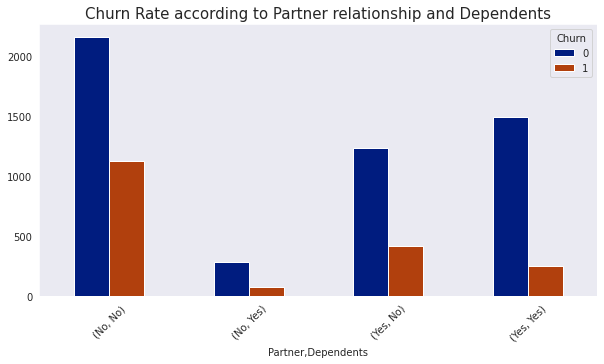

In [176]:
Partner_Dependents= df.groupby(['Partner','Dependents','Churn']).size().unstack()

Partner_Dependents.plot.bar(figsize=(10,5))
plt.title('Churn Rate according to Partner relationship and Dependents', size=15)
plt.xticks(rotation=45)

The ChurnRate is lower when the customer has "partner" and "dependent".

Text(53.95051946542708, 0.018902475863461703, 'Mean (μ): 61.31')

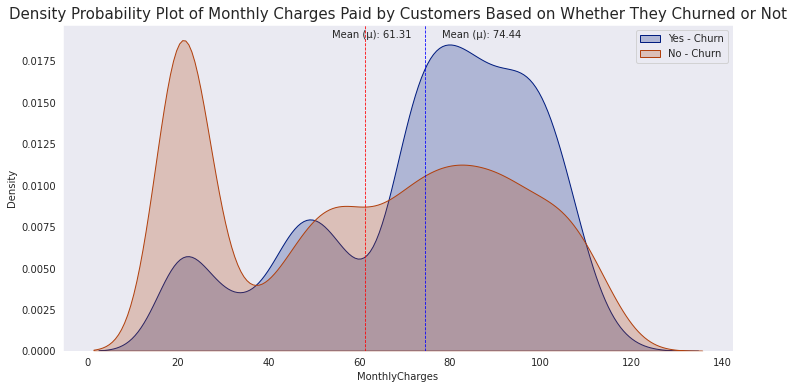

In [177]:
plt.figure(figsize=(12,6))

sns.kdeplot(data=df[df['Churn']==1], x='MonthlyCharges', shade=True, hue_order=['Month-to-month', 'One year', 'Two year'])
sns.kdeplot(data=df[df['Churn']==0], x='MonthlyCharges', shade=True, hue_order=['Month-to-month', 'One year', 'Two year'])

plt.legend(labels=["Yes - Churn","No - Churn"])
plt.title('Density Probability Plot of Monthly Charges Paid by Customers Based on Whether They Churned or Not', size=15)

min_ylim, max_ylim = plt.ylim()
plt.axvline(df['MonthlyCharges'][df['Churn']==1].mean(), color='blue', linestyle= '--', linewidth= 0.8)
plt.text(df['MonthlyCharges'][df['Churn']==1].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df['MonthlyCharges'][df['Churn']==1].mean()))

plt.axvline(df['MonthlyCharges'][df['Churn']==0].mean(), color='red', linestyle= '--', linewidth= 0.8)
plt.text(df['MonthlyCharges'][df['Churn']==0].mean()*0.88, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df['MonthlyCharges'][df['Churn']==0].mean()))



Customers with higher monthly charges tend to have a higher churn rate.

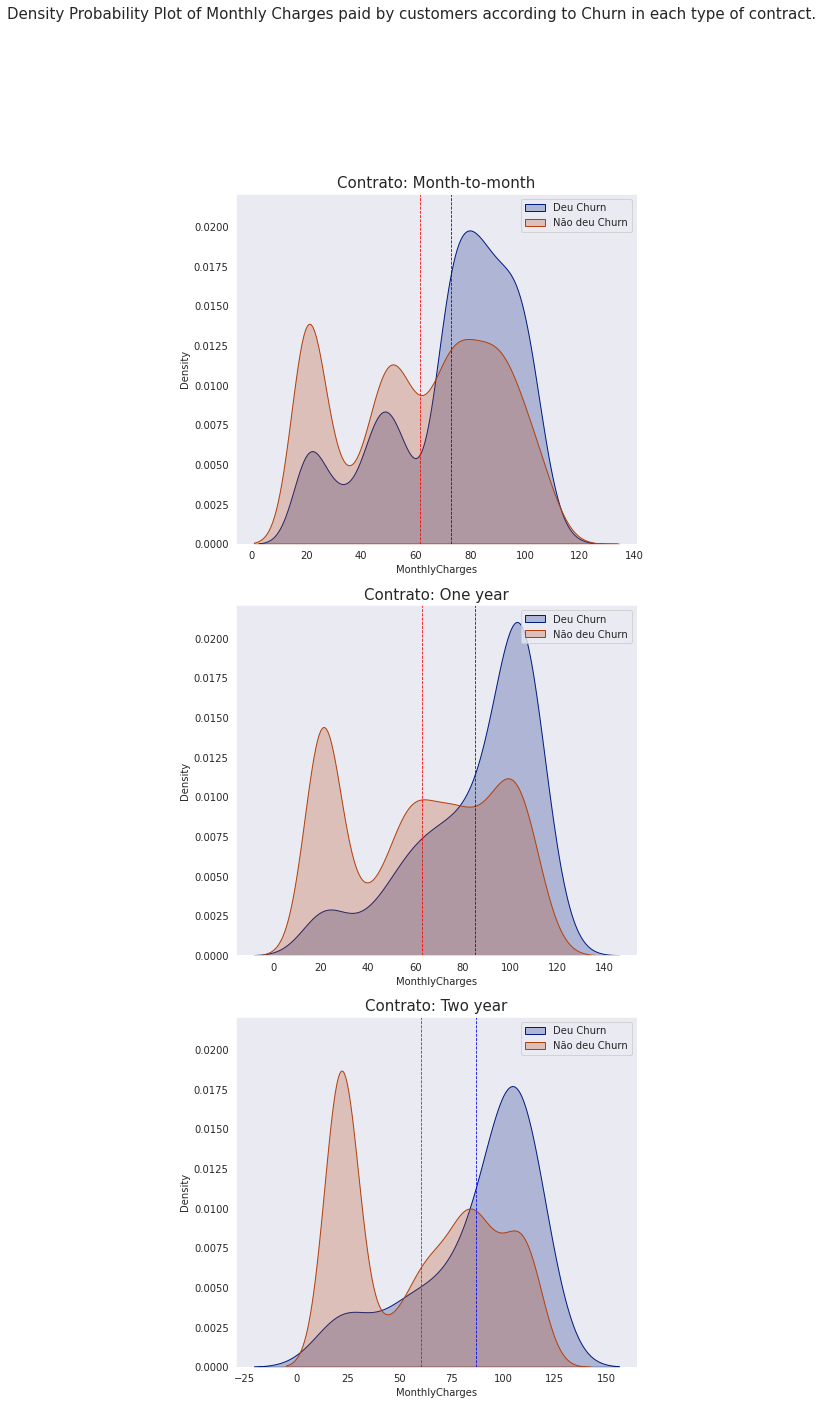

In [178]:

contracts = df['Contract'].unique()


fig, axes = plt.subplots(ncols=1, nrows=len(contracts), figsize=(7,20), sharey=True)


for i, contract in enumerate(contracts):
    sns.kdeplot(df.loc[(df['Contract'] == contract) & (df['Churn'] == 1), 'MonthlyCharges'], shade=True, ax=axes[i], label="Deu Churn")
    sns.kdeplot(df.loc[(df['Contract'] == contract) & (df['Churn'] == 0), 'MonthlyCharges'], shade=True, ax=axes[i], label="Não deu Churn")
    
  
    axes[i].set_title(f'Contrato: {contract}', fontsize=15)
    
   
    axes[i].axvline(df.loc[(df['Contract'] == contract) & (df['Churn'] == 1), 'MonthlyCharges'].mean(), color='blue', linestyle='--', linewidth=0.8)
    axes[i].axvline(df.loc[(df['Contract'] == contract) & (df['Churn'] == 0), 'MonthlyCharges'].mean(), color='red', linestyle='--', linewidth=0.8)

    axes[i].legend()
    axes[i].set_xlabel('MonthlyCharges')
    

fig.suptitle('Density Probability Plot of Monthly Charges paid by customers according to Churn in each type of contract.', size=15)

fig.tight_layout(pad=2)
plt.subplots_adjust(top=0.85)


The observed behavior remains independent of the type of contract.


A média da mensalidade dos clientes que deram Churn é aproximadamente 20% maior.
Hipótese: Num cenário macroeconômico instável, a população tende a reduzir as despesas que mais pesam no bolso.

Text(0.5, 1.0, 'Density Probability Graph of the amount paid by customers based on whether they have churned or not')

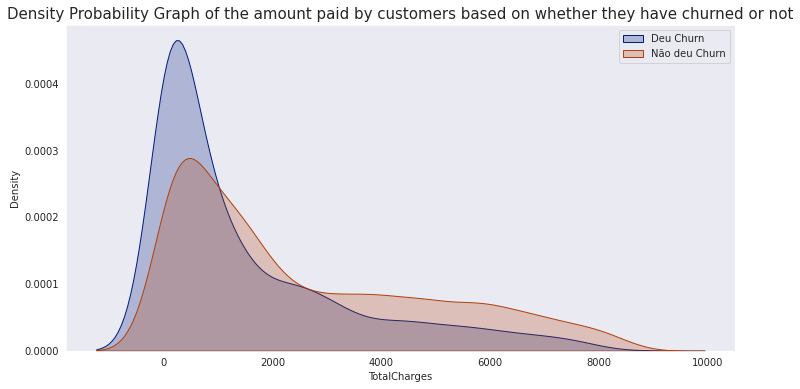

In [179]:
plt.figure(figsize=(12,6))

sns.kdeplot(df['TotalCharges'][df['Churn']==1], shade=True)
sns.kdeplot(df['TotalCharges'][df['Churn']==0], shade=True)

plt.legend(labels=["Deu Churn","Não deu Churn"])
plt.title('Density Probability Graph of the amount paid by customers based on whether they have churned or not', size=15)

# Data Preparation



The data preparation process is crucial because the quality of features used to train a machine learning model is critical to its performance. Feature engineering involves creating, selecting, and transforming features from raw data to improve data representation for the model and, consequently, improve model performance in the target task.

By observing our data, we noticed that there is a set of additional services offered to customers who have contracted internet service, namely: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. Given that there is a certain level of correlation, although not necessarily strong, between these services and our target variable (Churn), we will use feature extraction to create two new variables to synthesize all services and potentially obtain better predictors.

We will consider the four services related to security and protection, namely OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, as additional services, and create the binary variable "SecurityServices," which will receive a value of 1 if any of the four services are contracted.

On the other hand, we will create the binary variable "Streaming," which will receive a value of 1 if any of the two streaming services are subscribed.

Finally, we believe that the payment method may have an influence on the ChurnRate. Specifically, whether the customer pays automatically or not can be a good predictor. Therefore, we will create the variable 'Automatic_Payment.



In [180]:
df['Streaming'] = np.where((df2['StreamingTV_Yes'] == 1) | (df2['StreamingMovies_Yes'] == 1), 1, 0)

df['SecurityServices'] = np.where((df2['OnlineSecurity_Yes'] == 1) | (df2['OnlineBackup_Yes'] == 1) | 
                                  (df2['DeviceProtection_Yes'] == 1) | (df2['TechSupport_Yes'] == 1), 1, 0)
df['Automatic_Payment'] = np.where((df2['PaymentMethod_Bank transfer (automatic)'] == 1) | (df2['PaymentMethod_Credit card (automatic)'] == 1), 1, 0)



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'OnlineSecurity_Yes'),
  Text(1.5, 0, 'OnlineBackup_Yes'),
  Text(2.5, 0, 'DeviceProtection_Yes'),
  Text(3.5, 0, 'TechSupport_Yes'),
  Text(4.5, 0, 'StreamingTV_Yes'),
  Text(5.5, 0, 'StreamingMovies_Yes')])

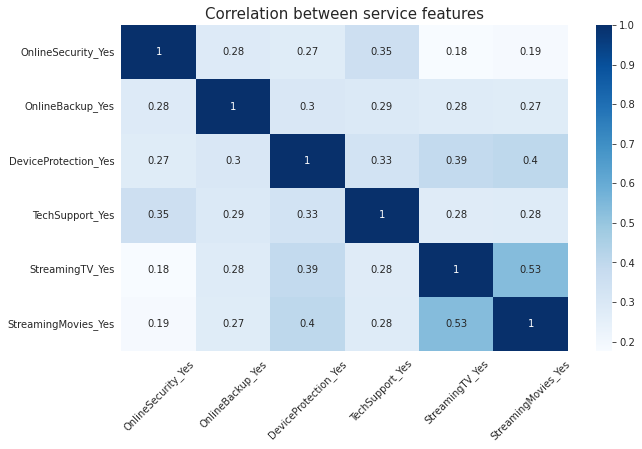

In [181]:
plt.figure(figsize=(10,6))
sns.heatmap(df2[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes', 'StreamingMovies_Yes']].corr(), annot=True, cmap='Blues')
plt.title('Correlation between service features', size=15)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Churn according to whether the customer has streaming or not')

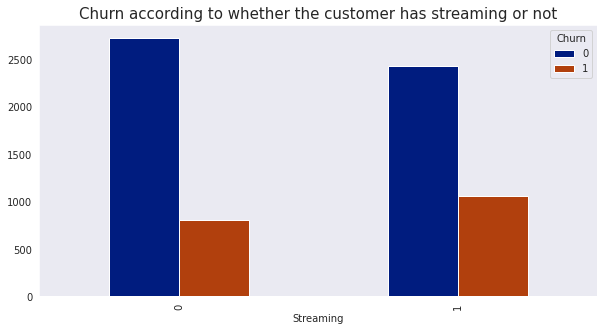

In [182]:
sc= df.groupby(['Streaming','Churn']).size().unstack()

sc.plot.bar(figsize=(10,5))
plt.title('Churn according to whether the customer has streaming or not', size=15)

Text(0.5, 1.0, 'Churn according to whether the customer has security services or not')

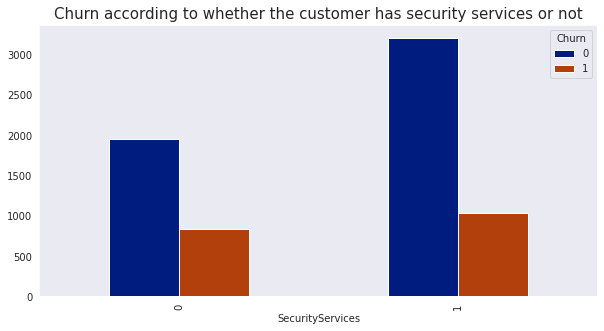

In [183]:
sc= df.groupby(['SecurityServices','Churn']).size().unstack()

sc.plot.bar(figsize=(10,5))

plt.title('Churn according to whether the customer has security services or not', size=15)


In [184]:
df= pd.get_dummies(df, columns=['gender','InternetService','Contract'])

features=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
          'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for feature in features:
    df[feature] = df[feature].astype(str)
    df[feature]= np.where((df[feature]=='Yes'), 1,0) 
    
df.drop('PaymentMethod', axis=1, inplace=True)
df.drop('gender_Female', axis=1, inplace=True)


cols = df.columns.tolist()
cols.remove('Churn')
df = pd.concat([df[cols], df['Churn']], axis=1)



df


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,SecurityServices,Automatic_Payment,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,1,1,0,0,0,1,0,0
2,0,0,0,2,1,0,1,1,0,0,...,1,0,1,1,0,0,1,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,1,1,1,0,0,0,1,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,0,1,1,0,0,0,1,0,0
7039,0,1,1,72,1,1,0,1,1,0,...,1,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7041,1,1,0,4,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [185]:
df = df.reset_index(drop=True)

X= df.drop('Churn', axis=1)
y= df['Churn']




In [186]:
from sklearn.preprocessing import StandardScaler


num_columns=['tenure', 'TotalCharges', 'MonthlyCharges']
df.dtypes

SC= StandardScaler()
df[num_columns] = SC.fit_transform(df[num_columns])

In [187]:
df['MonthlyCharges']

0      -1.161694
1      -0.260878
2      -0.363923
3      -0.747850
4       0.196178
          ...   
7027    0.664868
7028    1.276493
7029   -1.170004
7030    0.319168
7031    1.357932
Name: MonthlyCharges, Length: 7032, dtype: float64

# Hyperparameter Tuning -> Feature Selection -> Modeling

### Hyperparameter Tuning

After the feature engineering step, we need to apply some processes in order to extract the best possible accuracy from our machine learning model.

Each dataset can have its own characteristics, which means that the ideal parameters for one dataset may not be the same for another dataset. Parameter tuning allows the model to be adapted to the specific characteristics of the dataset, thus finding a balance between the complexity of the model and its generalization ability.

To perform this procedure, we choose RandomizedSearchCV.

Why not **GridSearchCV**, which tests all possible values and their relationships? Because its applicability can prove to be more operationally costly, making its neighboring counterparts, such as RandomizedSearchCV, more useful depending on the problem.

### Feature Selection
There are several algorithms that perform feature selection in a plausible and efficient way. Namely:

- PCA (dimensionality reduction)
- FeatureSelection
- SelectFromModel
- SelectKBest

We will use SelectKBest for our project because it is a consistent and effective algorithm. We will create a loop to test several values for the hyperparameter ''K'' (number of features to be selected), and plot a graph to determine the optimal value.

### Now, the Modeling!

Our target variable is binary. Therefore, it is a classification problem.
The appropriate choice of the model we will use depends on numerous factors. I will mention some:

Availability of labeled data
Type of problem
Dimensionality of features (attributes)
...
As we saw earlier, our target variable is unbalanced. That is, the number of customers who gave Churn is considerably less than the number who did not give Churn (about 1/3 less!).

We ran some tests and checked that Logistic Regression is suitable for this task.
I tested models more aggressively, and it produced a good accuracy.
Therefore, its application follows below.

Modelo: LogisticRegression
Melhores parâmetros: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 900, 'C': 41}
k: 2, acc 0.7576799511832407
k: 4, acc 0.7883916736712789
k: 6, acc 0.7899568004008792
k: 8, acc 0.7912370279968964
k: 10, acc 0.7980616756110177
k: 12, acc 0.799912711754817
k: 14, acc 0.802614202120781
k: 16, acc 0.8024719546101124
k: 18, acc 0.8044636218155954
k: 20, acc 0.8024729648907281
k: 22, acc 0.80204541413423
k: 24, acc 0.8041811473554894


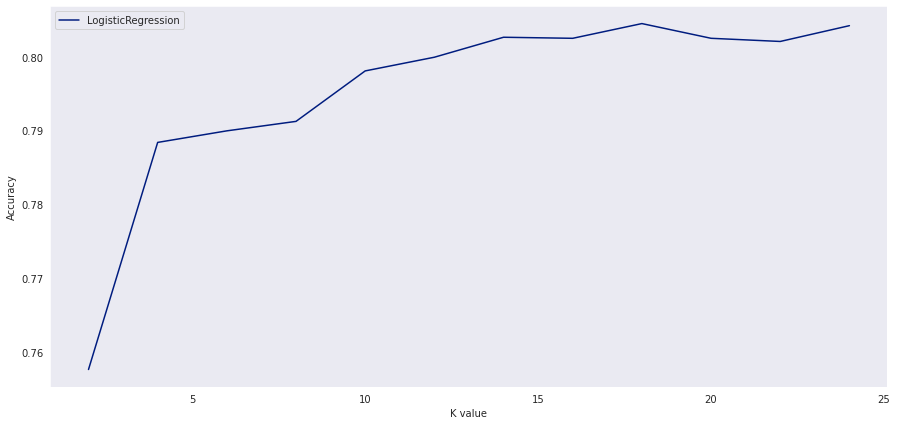

In [188]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV


plt.figure(figsize=(15,7))


models=[LogisticRegression]

#Loop for choose K value.

for model in models:
    k_score=[]
    print('Modelo: {}'.format(model.__name__))
    clf = model()
    
    #Establishing hyperparameters to be selected
    param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.arange(1, 1000, 10),
    'max_iter': np.arange(100, 2000, 100)
}
    search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=20, cv=5, random_state=42)
    search.fit(X, y)
    
    # catching the bests hyperparams
    best_params = search.best_params_
    # applying to the model
    clf.set_params(**best_params)
    print('Melhores parâmetros:', best_params)
    
    for k in range(2, X.shape[1]+1, 2):

        selector = SelectKBest(k=k)
        X_selected = selector.fit_transform(X, y)

        
        
        #Building a pipeline with SelectKBest and model with the relevant features.
        pipeline= Pipeline([('selector', selector), 
                            ('clf',clf)]) 
        
        #Splitting the data to obtain a model applicable to reality (using Cross-Validation)
        strat_k_fold= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X_selected, y, cv=strat_k_fold)
        
        #Calculating the score using the mean.
        acc = np.mean(scores)
        k_score.append(acc)
        
        print('k: {}, acc {}' .format(k, acc))
        
        
    plt.plot(range(2, X.shape[1]+1, 2), k_score, label= model.__name__)

plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
   

Observing the plotted graph above, we can see a concrete stabilization of accuracy from K=14. Therefore, we can configure a total quantity of around 14 attributes for a eficient application of our model.

In [189]:
selector = SelectKBest(k=14)
X_selected = selector.fit_transform(X, y)
clf.fit(X_selected, y)

LogisticRegression(C=41, max_iter=900, solver='newton-cg')

### Which were the selected features?

### SelectKBest

In [190]:
top_k_idx = selector.scores_.argsort()[::-1][:14]

# Get the names of the top 14 features
feature_names = X.columns[top_k_idx]

# Print the names of the top 14 features
print("Top 14 features:", feature_names)

score_selector= selector.scores_
mask= selector.get_support()

pd.Series(score_selector, index= X.columns).sort_values()


Top 14 features: Index(['Contract_Month-to-month', 'tenure', 'InternetService_Fiber optic',
       'Contract_Two year', 'InternetService_No', 'Automatic_Payment',
       'TotalCharges', 'MonthlyCharges', 'PaperlessBilling',
       'Contract_One year', 'OnlineSecurity', 'TechSupport', 'Dependents',
       'SeniorCitizen'],
      dtype='object')


gender_Male                       0.513304
PhoneService                      0.961054
MultipleLines                    11.284505
SecurityServices                 24.893520
StreamingMovies                  26.135445
StreamingTV                      28.240486
DeviceProtection                 30.937138
OnlineBackup                     47.949121
Streaming                        51.210076
InternetService_DSL             110.035764
Partner                         161.775966
SeniorCitizen                   163.012426
Dependents                      192.188857
TechSupport                     196.052416
OnlineSecurity                  212.445453
Contract_One year               230.627733
PaperlessBilling                267.487636
MonthlyCharges                  271.576990
TotalCharges                    291.344862
Automatic_Payment               325.685023
InternetService_No              383.981781
Contract_Two year               703.210304
InternetService_Fiber optic     733.951530
tenure     

The selectKbest algorithm calculates feature selection scores using the f_classifier method. This test calculates the variance between the target variable and each predictor variable. The resulting scores are used to select the top features for the model. The higher the score, the more relevant the feature is for the model.

### LogisticRegression Coeficients

In [191]:
#Get the column names
features = X.columns

#Get the k best features
selector.fit(X, y)

#Get the indices of the selected columns
selected_features = selector.get_support(indices=True)

#Create a new DataFrame with the selected features from SelectKBest
selected_df = X.iloc[:, selected_features]

#Get the coefficients of the logistic regression
clf.fit(selected_df, y)
coefficients = clf.coef_[0]

#Get the index of the columns ordered in decreasing order
ordered_columns_index = np.argsort(coefficients)[::-1]

#Get the names of the columns corresponding to the ordered coefficients
ordered_columns_names = selected_df.columns[ordered_columns_index]

#Create a DataFrame to store the columns and their corresponding coefficients
df_coef = pd.DataFrame({'Feature': ordered_columns_names, 'Coefficient': coefficients[ordered_columns_index]})

#Display the DataFrame sorted by coefficients in decreasing order
display(df_coef)

,Feature,Coefficient
0,Contract_Month-to-month,0.682739
1,InternetService_Fiber optic,0.592834
2,PaperlessBilling,0.397802
3,SeniorCitizen,0.271039
4,Contract_One year,0.005250
5,MonthlyCharges,0.003825
6,TotalCharges,0.000320
7,tenure,-0.056793
8,Dependents,-0.165471
9,Automatic_Payment,-0.269507


There are several reasons why SelectKBest and logistic regression may select different sets of important variables.

One possible reason is that SelectKBest and logistic regression evaluate variables in different ways. SelectKBest may select variables with high correlation with the target variable, even if this correlation is not linear, while logistic regression may select variables with high linear correlation with the target variable. In addition, logistic regression may capture interactions between variables that SelectKBest cannot.

Another possible reason is that SelectKBest may overestimate the importance of some variables and underestimate the importance of others. This can happen if SelectKBest does not take into account the interaction between variables. For example, two variables that are not important on their own may become important together, because the interaction between them is important for explaining the target variable.

# Metrics for model evaluation

We will use a confusion matrix to metrically visualize our model. This method basically consists of dividing our predictions into 4 types through a 2x2 matrix.

- True positive: Predicted that the customer would "Churn" and they did.
- False Positive: Predicted that the customer would "Churn" and they didn't. (Type 1 error)
- True negative: Predicted that the customer would not "Churn" and they didn't.
- False negative: Predicted that the customer would not "Churn" and they did. (Type 2 error)

The crucial point where we must pay attention is the False negative, since this classification is highly costly for the business, as we will not be able to approach the customer with the purpose of trying to retain them.

Our model is useful because, by knowing which customers are more likely to "Churn", we can develop promotions and discounts, thereby increasing their chance of remaining.

n_kfold: 1 - ConfusionMatrix: 
[[464  53]
 [ 79 108]]
None
n_kfold: 2 - ConfusionMatrix: 
[[464  53]
 [ 81 106]]
None
n_kfold: 3 - ConfusionMatrix: 
[[463  54]
 [ 87  99]]
None
n_kfold: 4 - ConfusionMatrix: 
[[458  58]
 [ 82 105]]
None
n_kfold: 5 - ConfusionMatrix: 
[[458  58]
 [ 93  94]]
None
n_kfold: 6 - ConfusionMatrix: 
[[459  57]
 [ 84 103]]
None
n_kfold: 7 - ConfusionMatrix: 
[[459  57]
 [ 86 101]]
None
n_kfold: 8 - ConfusionMatrix: 
[[463  53]
 [ 86 101]]
None
n_kfold: 9 - ConfusionMatrix: 
[[457  59]
 [ 85 102]]
None
n_kfold: 10 - ConfusionMatrix: 
[[481  35]
 [ 88  99]]
None
Segue a média:
[[462.6  53.7]
 [ 85.1 101.8]]


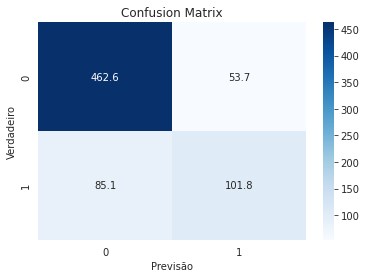

In [192]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix



confusion_matrix_accumulator= None
i=1

for train_index, test_index in strat_k_fold.split(X_selected, y):
    clf.fit(X_selected[train_index], y[train_index])
    ypred = clf.predict(X_selected[test_index])
    cm=confusion_matrix(y[test_index], ypred)
    print( print('n_kfold: {} - ConfusionMatrix: \n{}' .format(i, cm))
    )
    
    if confusion_matrix_accumulator is None:
        confusion_matrix_accumulator = cm
    else:
        confusion_matrix_accumulator += cm
    i=i+1
        
confusion_matrix_mean = confusion_matrix_accumulator / strat_k_fold.n_splits
print('Segue a média:')
print(confusion_matrix_mean)

sns.heatmap(confusion_matrix_mean , annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Confusion Matrix')
plt.show()

We will use an additional metric to evaluate our model.

The ROC curve shows the performance of the classification algorithm for each threshold point, graphically relating two variables: True Positive Rate (Recall or Sensitivity) and False Positive Rate.

We are facing a well-known trade-off: how to choose a good threshold to keep the model accurate, but most importantly, to maintain a high sensitivity. In practice, we want to effectively classify all customers who have churned (increasing the True Positive Rate) and thereby reducing the number of False Negatives.

To do this, we need to lower the probability threshold, making our filter less stringent in classifying a customer as having churned. However, this reduction leads to a decrease in precision, as more customers will be classified as having churned, leading to occasional imprecision in the classification.

In [193]:
TP= confusion_matrix_mean[1,1]

FP= confusion_matrix_mean[0,1]

TN= confusion_matrix_mean[0,0]

FN= confusion_matrix_mean[1,0]




Analogously to the procedure performed in generating the confusion matrix, we will generate the mean Roc_auc_score value based on each Cross_validation split.

In [194]:
roc_auc_accumulator= None
i=1

for train_index, test_index in strat_k_fold.split(X_selected, y):
    clf.fit(X_selected[train_index], y[train_index])
    ypred = clf.predict_proba(X_selected[test_index])
    roc_auc=roc_auc_score(y[test_index], ypred[:,1])
    print('n_kfold: {} - roc_auc: {}' .format(i, roc_auc))
    
    if roc_auc_accumulator is None:
        roc_auc_accumulator = roc_auc
      
    else:
        roc_auc_accumulator += roc_auc
    i=i+1
        
roc_auc_mean = roc_auc_accumulator / strat_k_fold.n_splits
print('Segue a média:')
print(roc_auc_mean)



n_kfold: 1 - roc_auc: 0.8491295938104448
n_kfold: 2 - roc_auc: 0.8504639063291924
n_kfold: 3 - roc_auc: 0.8420113974334975
n_kfold: 4 - roc_auc: 0.8485314844753968
n_kfold: 5 - roc_auc: 0.8396551009410107
n_kfold: 6 - roc_auc: 0.8382663847780126
n_kfold: 7 - roc_auc: 0.840618911412345
n_kfold: 8 - roc_auc: 0.8361729469800605
n_kfold: 9 - roc_auc: 0.8367222153131866
n_kfold: 10 - roc_auc: 0.8404271856734237
Segue a média:
0.8421999127146572


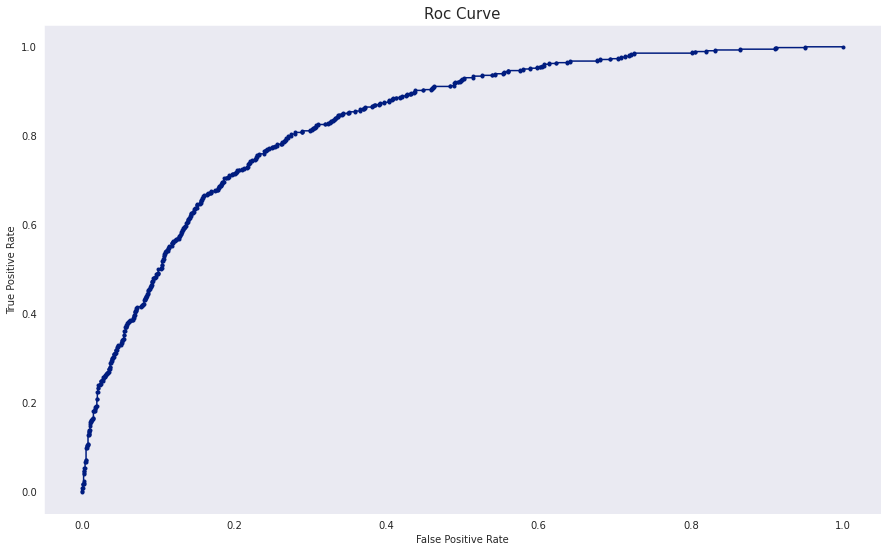

In [195]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, shuffle=True)

clf.fit(x_train, y_train)
ypred= clf.predict_proba(x_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, ypred)

plt.figure(figsize=(15,9))
plt.plot(lr_fpr, lr_tpr, marker='.', label= 'Logistic')

plt.title('Roc Curve', size=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

We will loop through various thresholds and select the best one based on the f1_score metric.

In [196]:
from sklearn.metrics import f1_score, precision_recall_fscore_support
import numpy as np

thresholds = np.arange(0, 1, 0.01)

precisions = []
recalls = []
f1_scores = []
y_proba=cross_val_predict(clf, X_selected, y, cv=strat_k_fold, method='predict_proba')[:,1]

# calculate the precision, recall, and F1 score values for each threshold value.
for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    print('threshold: {}' .format(t))
    print('Precision: {}' .format(precision))
    print('Recall: {}' .format(recall))
    print('f1_score: {} \n' .format(f1))
 
# Find the best Threshold based on f1-score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

print("The best Threshold is :", best_threshold)


threshold: 0.0
Precision: 0.26578498293515357
Recall: 1.0
f1_score: 0.41995281429052916 

threshold: 0.01
Precision: 0.29286726499763815
Recall: 0.9951845906902087
f1_score: 0.45255474452554745 

threshold: 0.02
Precision: 0.3131347325660122
Recall: 0.9898341359015517
f1_score: 0.47576186190047576 

threshold: 0.03
Precision: 0.32887700534759357
Recall: 0.9871589085072231
f1_score: 0.49338146811071 

threshold: 0.04
Precision: 0.34159522922102126
Recall: 0.9807383627608347
f1_score: 0.5067035245335176 

threshold: 0.05
Precision: 0.3521562560433185
Recall: 0.9743178170144462
f1_score: 0.5173295454545455 

threshold: 0.06
Precision: 0.3626549380247901
Recall: 0.9705724986623863
f1_score: 0.5280163003929559 

threshold: 0.07
Precision: 0.3721074380165289
Recall: 0.9636169074371321
f1_score: 0.5368907437770158 

threshold: 0.08
Precision: 0.38131797824696095
Recall: 0.956661316211878
f1_score: 0.545288197621226 

threshold: 0.09
Precision: 0.38927943760984185
Recall: 0.9481005885500268
f1

We'll use 0.36 threshold value to construct our definitive confusionmatrix.

# In what ways can we use the analysis to drive financial gains for the company"

To conclude, it is essential to adopt tools that can effectively convey the insights gained from the analysis and apply them to the current business. In order to demonstrate how the technical apparatus represented by the analysis above will be used in decision-making, we will use the analytical structure:

Expected Value
This structure consists of evaluating possible outcomes and the associated gains or losses for each outcome, based on the probabilities predicted by the model. With this information, the company can make informed decisions about how to allocate resources and which actions to take to maximize gains and minimize losses.

To do so, we need to be aware of a necessary concept for our calculation:

*Total Churn Cost per customer = (Customer Lifetime - Average number of months that the customer stays until churn) * Average gross profit that the company earns per customer

Customer Lifetime: We will calculate the average of the "tenure" variable.

Average number of months that the customer stays until churn: We will calculate the average "tenure" variable only for customers who churned.

Average gross profit per customer: We will calculate the average of the monthly revenue and multiply it by the usual gross margin of the sector (47%).

By applying the Expected Value framework and using the above calculations, the company can gain valuable insights into the cost of churn per customer and make informed decisions on how to reduce this cost and increase profitability.




In [197]:
customer_lifetime= df_copy['tenure'].mean()
average_month_churn= df_copy['tenure'][df_copy['Churn']==1].mean()
gross_profit= df_copy['MonthlyCharges'].mean() * 0.47
total_costumers= 7032

In [198]:
customer_lifetime

32.421786120591584

In [199]:
total_cost = round((customer_lifetime - average_month_churn) * gross_profit, 2)
total_cost
total_cost_discount= total_cost*0.85
total_cost_discount
discount= total_cost - total_cost_discount


costbenefit_mat= np.array([[0, -65.98],
                            [-439.95, 373.87]], dtype= float)

Our cost/benefit confusion_matrix will be based on the following strategy:

When classifying as TP: we will have the possibility of approaching the customer with the aim of retaining them in the company. Our strategy is to offer a 15% discount. The benefit will be: total cost of the customer - discount 15% = $373.87.

FP: We will give a discount mistakenly to a customer who would not churn, therefore, they would stay in the company anyway. The value of the loss is: $65.98.

TN: Cost/benefit will be 0, after all, we correctly predicted that the customer would already stay in the company.

FN: Our point of attention! We will lose the total cost of the customer: $439.85.

<AxesSubplot:>

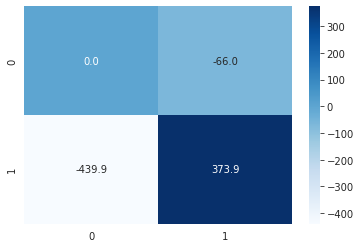

In [200]:
sns.heatmap(costbenefit_mat , annot=True, fmt='.1f', cmap='Blues')

Text(66.51517214163822, 0.96, 'Luco máximo: 63.35')

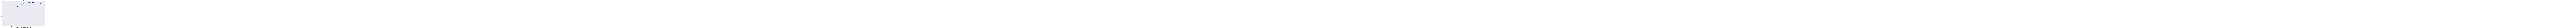

In [201]:
profits = []
thresholds = sorted(y_proba, reverse=True)

    
for T in thresholds:
  y_pred = (y_proba > T).astype(int)
  confusion_mat = confusion_matrix(y, y_pred)
        
  profit = np.sum(confusion_mat * costbenefit_mat) / len(y)
  profits.append(profit)


plt.figure(figsize= (15,9))    
plt.title('Profit Curve', size=16)
plt.xlabel('Percentage of test examples (ranked by descending score)')
max_profit = max(profits)
min_ylim, max_ylim = plt.ylim()
plt.plot(np.linspace(0, 1, len(y)), profits, label = 'LogisticRegression, max profit ${} per user'.format(max_profit))



plt.text(max_profit*1.05, max_ylim*0.96, 'Luco máximo: {:.2f}'.format(max_profit))

The purpose of plotting a profit curve is to help evaluate the performance of a binary classification model in terms of its profitability. The curve shows how much profit the model generates at different decision thresholds, which are determined by sorting the test examples by their predicted probability of belonging to the positive class in descending order.

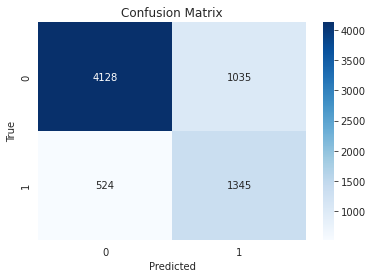

In [202]:
best_threshold

y_proba=cross_val_predict(clf, X_selected, y, cv=strat_k_fold, method='predict_proba')[:,1]

y_pred_best= (y_proba >= best_threshold).astype(int)
confusion_matrix_best= confusion_matrix(y, y_pred_best)
sns.heatmap(confusion_matrix_best , annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




In [203]:


probability_tp= confusion_matrix_best[1,1]/7032
probability_fp= confusion_matrix_best[0,1]/7032
probability_tn= confusion_matrix_best[0,0]/7032
probability_fn= confusion_matrix_best[1,0]/7032

Valor_esperado_por_cliente= ((probability_tp*total_cost_discount) + (probability_fp*(-discount)) + (probability_tn*0) + (probability_fn*total_cost))
Valor_esperado_por_cliente

94.57525597269625

The expected value obtained through the confusion matrix was 94.57, indicating a measure of the accuracy of the model's predictions. This value is essential for stakeholders and decision-makers as it provides valuable insights into the effectiveness of the predictive model in correctly classifying data. By analyzing the confusion matrix, decision-makers can identify areas where the model is performing well and areas where it is making errors. This information is crucial in making informed decisions to optimize the model's performance and allocate resources effectively within the company. Therefore, with an expected value of 94.57, decision-makers can have confidence in the accuracy of the model's predictions and use this information to make strategic decisions in the telecommunications sector.

# Recomendations

1- Incentivizing long-term contracts can be a good recommendation based on our Analysis and SelectKBest insights.
The contract type has a considerable importance to our variable Churn, indicating that customers who sign up for two-year contracts are less likely to churn.
 Therefore, encouraging customers to sign up for longer-term contracts could potentially reduce churn rate and increase customer retention. This can be done through offering attractive discounts or exclusive benefits to customers who choose longer-term contracts. Additionally, 
offering high-quality customer service and personalized support to these customers can also help to build loyalty and increase the chances of contract renewal.

2- The analysis revealed that customers who have Fiber optic InternetService are more likely to churn. Therefore, we recommend that the company should consider improving the quality of the Fiber optic service and communication with customers who have this service to address any issues or concerns they may have. Additionally, the company could consider offering incentives or promotions

3- Elderly customers have a higher churn rate compared to other age groups. Focusing on improving the customer experience and providing tailored services to meet the needs of this customer segment to increase retentio could be a valid approach.

4-Based on the logistic regression analysis, it appears that customers who do not have Techsupport and OnlineSecurity services have a higher churn rate. Therefore, a recommendation that could be made is to encourage customers to sign up for these services, this could potentially help to reduce the churn rate and improve customer retention.
To achieve this, the company should consider launching targeted marketing campaigns to highlight the importance and benefits of these services. 

5-The convenience of not having to manually make payments can reduce the likelihood of missed payments and late fees, which can contribute to customer dissatisfaction and ultimately lead to churn. By promoting automatic payment options and emphasizing the benefits of consistency and convenience, companies may be able to reduce churn rates and improve customer retention.